In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
print(df.columns)

Index(['text', 'category', 'cleaned_text'], dtype='object')


In [75]:
# Load Twitter and Reddit datasets
twitter_df = pd.read_csv(r"D:\task 2 data\Twitter_Data.csv")
reddit_df = pd.read_csv(r"D:\task 2 data\Reddit_Data.csv")

# Rename text columns to unify the structure
twitter_df = twitter_df.rename(columns={'clean_text': 'text'})
reddit_df = reddit_df.rename(columns={'clean_comment': 'text'})

# Merge both datasets
df = pd.concat([twitter_df, reddit_df], ignore_index=True)

# Preview data
df.head()




,text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   text      200125 non-null  object 
 1   category  200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB
None
category
 1.0    88080
 0.0    68355
-1.0    43787
Name: count, dtype: int64


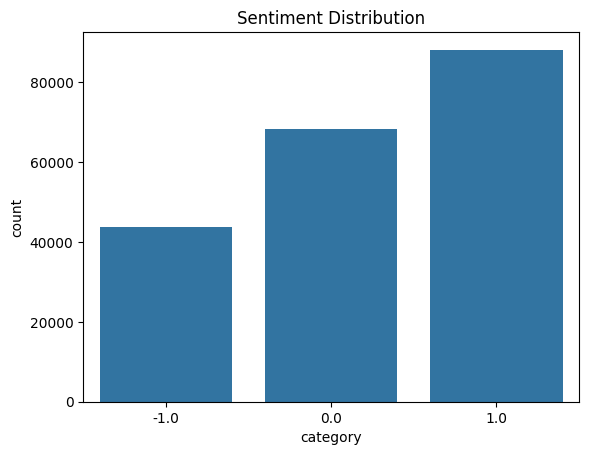

In [76]:
# Info about the dataset
print(df.info())

# Count each sentiment category
print(df['category'].value_counts())

# Visualize sentiment distribution
sns.countplot(data=df, x='category')
plt.title("Sentiment Distribution")
plt.show()


In [77]:
# استبدال القيم الفارغة في عمود text
df['text'] = df['text'].fillna("")

# تعريف دالة التنظيف المعدلة
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# تطبيق التنظيف
df['cleaned_text'] = df['text'].apply(clean_text)


In [78]:
# Convert text to numerical features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable
y = df['category']


In [79]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# ✅ شيل أي صف فيه قيمة مفقودة في عمود التصنيف
df = df.dropna(subset=['category'])

# ✅ كمل تنظيف النصوص وملء الخانات الفاضية
df['text'] = df['text'].fillna('')

# ✅ بعد التنظيف، تقدر تكمل بالـ TF-IDF وغيره عادي


In [81]:
# ✅ حذف الصفوف اللي فيها نواقص في النص أو الليبل
df = df.dropna(subset=["cleaned_text", "category"])

# ✅ إعادة ضبط الفهارس بعد الحذف
df = df.reset_index(drop=True)

# ✅ تحديد الـ Features والـ Labels
X = df["cleaned_text"]
y = df["category"]

# ✅ تقسيم البيانات لتدريب واختبار
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ تحويل النصوص إلى أرقام باستخدام TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# ✅ تدريب الموديل (ده هو الجزء اللي كان فيه المشكلة)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)  # ← دلوقتي تمام، مفيش فرق في عدد العينات

# ✅ التنبؤ والتقييم
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8953926832313647
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.88      0.77      0.82      8785
         0.0       0.87      0.97      0.92     13651
         1.0       0.92      0.90      0.91     17609

    accuracy                           0.90     40045
   macro avg       0.89      0.88      0.88     40045
weighted avg       0.90      0.90      0.89     40045



In [82]:
# ✅ استخدم نفس vectorizer اللي فوق (vectorizer مش tfidf)

def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])  # ← استخدم نفس vectorizer اللي دربت بيه
    return model.predict(vec)[0]

# ✅ جرب
predict_sentiment("I really enjoyed this product, it's amazing!")


np.float64(1.0)

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# ✅ 1. استخدم الداتا الأصلية
X = df['cleaned_text']
y = df['category']

# ✅ 2. قسم الداتا
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 3. TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_texts)

# ✅ 4. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

# ✅ 5. Evaluate using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    results[name] = {
        'mean accuracy': scores.mean(),
        'std dev': scores.std()
    }

# ✅ 6. Print results
for name, metrics in results.items():
    print(f"{name}: Mean Accuracy = {metrics['mean accuracy']:.4f}, Std Dev = {metrics['std dev']:.4f}")


Logistic Regression: Mean Accuracy = 0.8914, Std Dev = 0.0024
Naive Bayes: Mean Accuracy = 0.7195, Std Dev = 0.0017
Linear SVM: Mean Accuracy = 0.9026, Std Dev = 0.0019


In [85]:
# 🔧 Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# 🚀 Run Grid Search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

# ✅ Best Model Summary
print("Best Logistic Regression Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

# Replace main model with best one (optional)
best_model = grid.best_estimator_


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.9055232823663358
